# Projekt
Programming for Data Science
Lukas Schierle

<h2 style="color:blue;">1. Definition/Formulierung der Fragestellung</h2>
<h2 style="color:blue;">## Aufgabenstellung (10 Pkt.)</h2><span style='color:blue'> 

Definieren Sie eine Sie interessierende bzw. interessante Fragestellung im Zusammenhang mit dem Datensatz:

-   Was interessiert Sie an dem Datensatz?
-   Welche spezifische Fragestellung würden Sie gern mit Hilfe des Datensatzes beantworten?
-   Was erwarten Sie, angesichts Ihrer Fragestellung, bezüglich des Datens
<span>atzes?

## Fragestellung zum Datensatz
- Welche Produkte verkaufen sich am besten?
- In welchen Staaten werden die besten Umsätze gemacht?
- Welche "Ship Mode[s]" werden in welchen Staaten am meisten genutzt?
- Welche Produkte werden mit hoher Priorität bewertet?
- Wie wirken Discounts auf die Bestellungen?

### Fragestellungen während der Analyse der Daten
- Wann wurden Produkte geordert und wann wurden diese verschickt?
- Gibt es`(gleiche) Produkte die teilweise in unterschiedlich großen Boxen verschickt wurden?

<h2 style="color:blue;">2. Laden der Daten</h2>
<h2 style="color:blue;">Aufgabenstellung (10 Pkt.)</h2>
<span style='color:blue'> 
Laden Sie die Daten in das Notebook und verschaffen Sie sich einen ersten Überblick:
Welche Typen sind enthalten? Ist sichergestellt, dass alle Daten den richtigen Typ haben? Haben die Daten irgendwelche "Seltsamkeiten" mit denen Sie umgehen müssen, wie z.B. anders codierte `NA`'s, mehrere Tabellen, ... etc.  Je nach Datensatz können Sie die Daten auch in eine Datenbank laden und dann auf diese in Python zugreifen.

Beschreiben Sie, was Sie tun müssen, bevor Sie die Daten im nächsten Abschnitt aufbereiten und bearbeiten können!
</span>

## Verwendete Pakete: 
- **pandas:** McKinney W (2010) Data Structures for Statistical Computing in Python. Austin, Texas, pp 56–61 https://conference.scipy.org/proceedings/scipy2010/mckinney.html
- **numpy:** Harris CR, Millman KJ, Van Der Walt SJ, et al (2020) Array programming with NumPy. Nature 585:357–362. https://doi.org/10.1038/s41586-020-2649-2
- **matplotlib:** Hunter JD (2007) Matplotlib: A 2D Graphics Environment. Comput Sci Eng 9:90–95. https://doi.org/10.1109/MCSE.2007.55

In [1]:
# Importieren der Pakete
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Beschreibung des Datensatzes: 
**Australia Retail Data** (z.Dt.: Australien-Einzelhandelsdaten) \
Heruntergeladen von der Plattform Kaggle am ``09.04.2024``: https://www.kaggle.com/datasets/chickenfulleton/australia-retail-data \
Der Datensatz steht unter der folgenden Creative Commons Lizens: [Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)](https://creativecommons.org/licenses/by-nc/4.0/)

In [2]:
# Laden der Daten als pandas dataframe
df = pd.read_csv("../data/dataaus.csv")
pd.set_option('display.max_columns', None) # damit alle Spalten angezeigt werden
df.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,2/9/2019,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,4/9/2019,$156.50,$300.97,$144.47,23.0,"$4,533.52",2%,$194.83,"$4,757.22",$7.18,"$4,291.55"
1,5001-1,24/10/2020,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,26/10/2020,$0.24,$1.26,$1.02,8.0,$45.20,3%,$0.00,$45.90,$0.70,$46.91
2,5004-1,13/3/2019,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,Office Supplies,Small Box,Regular Air,13/3/2019,$42.11,$80.98,$38.87,45.0,$873.32,4%,$72.23,$837.57,$7.18,$82.58
3,5009-1,18/2/2018,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,Office Supplies,Wrap Bag,Regular Air,20/2/2018,$5.33,$8.60,$3.27,16.0,$73.52,1%,$4.35,$740.67,$6.19,$730.92
4,5010-1,13/9/2019,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,Office Supplies,Wrap Bag,Express Air,17/9/2019,$1.53,$2.78,$1.25,49.0,$138.46,7%,$5.95,$123.77,$1.34,$125.97


In [3]:
# Exploration des dataframes
print(df.info())
anz_zeilen, anz_spalten = df.shape
print(f"Der Datensatz hat {anz_zeilen} Zeilen und {anz_spalten} Spalten.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order No           5000 non-null   object 
 1   Order Date         5000 non-null   object 
 2   Customer Name      5000 non-null   object 
 3   Address            4999 non-null   object 
 4   City               5000 non-null   object 
 5   State              5000 non-null   object 
 6   Customer Type      5000 non-null   object 
 7   Account Manager    5000 non-null   object 
 8   Order Priority     5000 non-null   object 
 9   Product Name       5000 non-null   object 
 10  Product Category   5000 non-null   object 
 11  Product Container  5000 non-null   object 
 12  Ship Mode          5000 non-null   object 
 13  Ship Date          5000 non-null   object 
 14  Cost Price         5000 non-null   object 
 15  Retail Price       5000 non-null   object 
 16  Profit Margin      5000 

### Was fällt auf?
- Es scheinen alle Spalten auch mit Werten gefüllt zu sein, lediglich in den Spalten ``Address`` & ``Order Quantity`` gibt es jeweils einen null value
- Alle Spalten, bis auf ``Order Quantity`` haben den Datentyp ``object``, darunter sind auch Spalten, zu welchen vermutlich eher eine anderer Datentyp besser passt: Diese müssen anschließend transformiert werden. 

In [4]:
# Diese beiden Eintrage mit null values betrachten: 
adress_is_null = df[df['Address'].isnull()]
order_quantity_is_null = df[df['Order Quantity'].isnull()]

print(adress_is_null)
print(order_quantity_is_null)

     Order No Order Date Customer Name Address    City State   Customer Type  \
4354   6384-1  27/4/2021  Patt Bawkins     NaN  Sydney   NSW  Small Business   

     Account Manager Order Priority              Product Name  \
4354    Tina Carlton           High  HFX LaserJet 3310 Copier   

     Product Category Product Container    Ship Mode  Ship Date Cost Price  \
4354  Office Supplies         Small Box  Regular Air  29/4/2021    $377.99   

     Retail Price Profit Margin  Order Quantity  Sub Total Discount %  \
4354      $599.99       $222.00            47.0  $9,599.84         0%   

     Discount $ Order Total Shipping Cost      Total  
4354      $0.00   $9,599.84        $24.49  $9,624.33  
     Order No Order Date Customer Name                  Address    City State  \
1411   5428-1  25/2/2019   Jhrip Luxen  4A Lyons St,Strathfield  Sydney   NSW   

     Customer Type Account Manager Order Priority             Product Name  \
1411   Home Office    Tina Carlton           High  Cr

Die fehlende Adresse lässt sich aus dem Datensatz nicht weiter ermitteln.
Der fehlende Eintrag aus der Order Quality ist jedoch implizit im Datensatz erhalten und kann ermittlet werden, indem ``Sub Total`` durch ``Retail Price`` geteilt wird.

In [5]:
def calculate_order_quantity(row):
    sub_total= np.float64(row['Sub Total'].replace('$', ''))
    retail_price = np.float64(row['Retail Price'].replace('$', ''))
    calculated_order_quantity = np.round((sub_total / retail_price), 1)
    return calculated_order_quantity

df['Order Quantity'] = df.apply(lambda row: calculate_order_quantity(row) if pd.isnull(row['Order Quantity']) else np.float64(row['Order Quantity']), axis=1)

# Prüfen, ob es weiterhin einen null value in der Spalte gibt
order_quantity_is_null = df[df['Order Quantity'].isnull()]
print(order_quantity_is_null)
df.head(2)

Empty DataFrame
Columns: [Order No, Order Date, Customer Name, Address, City, State, Customer Type, Account Manager, Order Priority, Product Name, Product Category, Product Container, Ship Mode, Ship Date, Cost Price, Retail Price, Profit Margin, Order Quantity, Sub Total, Discount %, Discount $, Order Total, Shipping Cost, Total]
Index: []


,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,2/9/2019,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,4/9/2019,$156.50,$300.97,$144.47,23.0,"$4,533.52",2%,$194.83,"$4,757.22",$7.18,"$4,291.55"
1,5001-1,24/10/2020,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,26/10/2020,$0.24,$1.26,$1.02,8.0,$45.20,3%,$0.00,$45.90,$0.70,$46.91


In [6]:
# Eine Reihe des Dataframes scheint eine Bestellung eines einzigen Produktes zu Beschreiben. 
# Ist die ``Order No`` tatsächlich unique, oder gibt es Duplikate? 
duplicate_orders = df['Order No'].duplicated()
print(duplicate_orders.any())

True


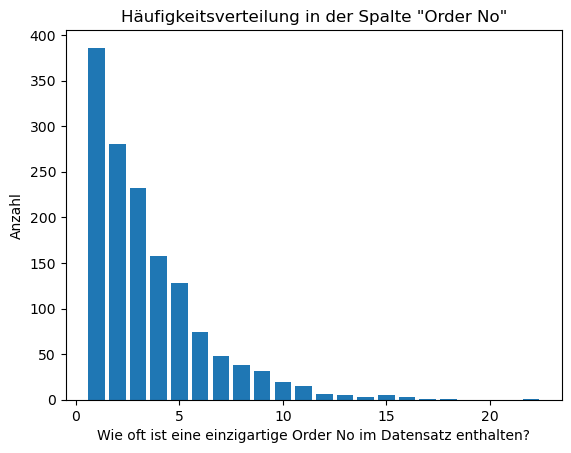

In [7]:
value_counts = df['Order No'].value_counts()

# Häufigkeiten von Werten der Spalte ``Order No`` berechnen
count_of_counts = value_counts.value_counts().sort_index()

# Visualisierung
plt.bar(count_of_counts.index, count_of_counts.values)
plt.xlabel('Wie oft ist eine einzigartige Order No im Datensatz enthalten?')
plt.ylabel('Anzahl')
plt.title('Häufigkeitsverteilung in der Spalte "Order No"')
plt.show()

<h2 style="color:blue;">3. Bearbeiten/Transformieren der Daten</h2>
<h2 style="color:blue;">Aufgabenstellung (15 Pkt.)</h2>
<span style='color:blue'> 
In diesem Abschnitt sollten Sie alle notwendigen Transformationen/Bereiningungen/... etc. der Daten vornehmen (Data Muning, Data Cleansing), wie z.B.: \* Umcodierung von Daten, z.B. numerisch in kategorial \* Subsetting der Daten \* Joining von Datentabellen - falls nötig. Welcher Join ist notwendig? Warum? \* ...

Verschaffen Sie sich eine Übersicht der transformierten Daten. Sie können hierzu Hilfsmittel wie `glimpse()`, `skim()` und `head()` benutzen, um Ihre Erläuterungen zu veranschaulichen.

Sind die sich ergebenden Daten so, wie Sie es erwartet haben? Warum oder warum nicht?
</span>

Um die Berechnung des Werts vornehmen zu können, müssen zunächst die Datentypen der Spalten angepasst werden.

In [8]:
# Spaltennamen ermitteln
column_names = df.columns.tolist()
print(column_names)

['Order No', 'Order Date', 'Customer Name', 'Address', 'City', 'State', 'Customer Type', 'Account Manager', 'Order Priority', 'Product Name', 'Product Category', 'Product Container', 'Ship Mode', 'Ship Date', 'Cost Price', 'Retail Price', 'Profit Margin', 'Order Quantity', 'Sub Total', 'Discount %', 'Discount $', 'Order Total', 'Shipping Cost', 'Total']


In [9]:
# Dataframe vor der Transformation anzeigen
df.head(2)

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,2/9/2019,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,4/9/2019,$156.50,$300.97,$144.47,23.0,"$4,533.52",2%,$194.83,"$4,757.22",$7.18,"$4,291.55"
1,5001-1,24/10/2020,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,26/10/2020,$0.24,$1.26,$1.02,8.0,$45.20,3%,$0.00,$45.90,$0.70,$46.91


In [10]:
# Transformation der Datentypen
data_type_map = {'Order No': str, 'Order Date': 'datetime64[D]', 'Customer Name': str, 'Address': str, 'City': str, 'State': str, 
                 'Customer Type': 'category', 'Account Manager': str, 'Order Priority': 'category', 'Product Name': str, 'Product Category': 'category',
                 'Product Container': 'category', 'Ship Mode': 'category', 'Ship Date': 'datetime64[D]', 'Cost Price': float, 'Retail Price' :float,
                 'Profit Margin' : float, 'Order Quantity': float, 'Sub Total': float, 'Discount %': float, 'Discount $': float, 
                 'Order Total': float, 'Shipping Cost': float, 'Total': float}

dollar_columns = ('Cost Price', 'Retail Price', 'Profit Margin', 'Sub Total', 'Discount $', 'Order Total', 'Shipping Cost', 'Total')
percent_columns = ('Discount %')

for column, dtype in data_type_map.items():
#    print('Beginne transformation der Spalte '+ str(column)) # use for debbuging
    if dtype == 'datetime64[D]':
        df[column] = pd.to_datetime(df[column], format='%d/%m/%Y')
    elif column in dollar_columns:
        df[column] = df[column].str.replace('$', '').str.replace(',', '').astype(float)
    elif column in percent_columns:
        df[column] = df[column].str.replace('%', '').str.replace(',', '').astype(float)
    else:
        df[column] = df[column].astype(dtype)

In [11]:
# Dataframe nach der Transformation anzeigen
df.head(2)

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,2019-09-02,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,2019-09-04,156.50,300.97,144.47,23.0,4533.52,2.0,194.83,4757.22,7.18,4291.55
1,5001-1,2020-10-24,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,2020-10-26,0.24,1.26,1.02,8.0,45.20,3.0,0.00,45.90,0.70,46.91


In [12]:
# Anzeigen der Datentypen nach der Transformation
print('Die Datentypen nach der Transformation: \n'+ str(df.dtypes))

Die Datentypen nach der Transformation: 
Order No                     object
Order Date           datetime64[ns]
Customer Name                object
Address                      object
City                         object
State                        object
Customer Type              category
Account Manager              object
Order Priority             category
Product Name                 object
Product Category           category
Product Container          category
Ship Mode                  category
Ship Date            datetime64[ns]
Cost Price                  float64
Retail Price                float64
Profit Margin               float64
Order Quantity              float64
Sub Total                   float64
Discount %                  float64
Discount $                  float64
Order Total                 float64
Shipping Cost               float64
Total                       float64
dtype: object


<h2 style="color:blue"> 4. Geeignete Visualisierung und Aggregation der Daten </h2>
<h2 style="color:blue">Aufgabenstellung (15 Pkt.) </h2>
<span style="color:blue">
Fassen Sie die Daten in einer geeigenten Form zur Beantwortung Ihrer formulierten Fragestellung zusammen. Ziehen Sie auch geeignete Visualisierungen der transformierten und/oder aggregierten Daten heran, um Ihre Aussagen entsprechend zu untermauern oder zu veranschaulichen.

Hier können Sie auch geeignete statistische Verfahren bzw. Modellierungen nutzen, falls diese Ihnen bezüglich Ihrer Fragestellung weiterhelfen.
</span>

## Weiteres Verständniss für den Datensatz bekommen

In [13]:
# Wie viel Account Manager & wie viele verschiedene Produkte gibt es?
account_manager_count = df['Account Manager'].nunique()
product_name_count = df['Product Name'].nunique()

print(f'Es gibt {account_manager_count} verschiedene Account Manager und {product_name_count} verschiedene Produkte.')

Es gibt 19 verschiedene Account Manager und 257 verschiedene Produkte.


In [14]:
# Spalten mit Kategorien genauer betrachten: Wie Wertausprägungen gibt es und wie häufig treten diese auf?
category_columns = ['Customer Type',  'Order Priority',  'Product Category', 'Product Container', 'Ship Mode']

value_counts_results = {}
for col in category_columns:
    value_counts_results[col] = df[col].value_counts()

# Ausgabe formatieren
for col, counts in value_counts_results.items():
    print(f"Counts for column '{col}':")
    print(f'{counts}\n')

Counts for column 'Customer Type':
Customer Type
Corporate         1823
Home Office       1232
Small Business    1088
Consumer           857
Name: count, dtype: int64

Counts for column 'Order Priority':
Order Priority
High             1124
Not Specified    1092
Medium           1038
Critical          885
Low               861
Name: count, dtype: int64

Counts for column 'Product Category':
Product Category
Office Supplies    3952
Technology          879
Furniture           169
Name: count, dtype: int64

Counts for column 'Product Container':
Product Container
Small Box     2590
Wrap Bag      1472
Small Pack     571
Large Box      141
Jumbo Drum     117
Medium Box     109
Name: count, dtype: int64

Counts for column 'Ship Mode':
Ship Mode
Regular Air       4236
Express Air        647
Delivery Truck     117
Name: count, dtype: int64



In [15]:
# Von wann bis wann erhält der Datensatz einträge? 
first_order_day = df['Order Date'].min().date()
last_order_day = df['Order Date'].max().date()
print(f'Der Datensatz enthält Bestellungen von {first_order_day} bis {last_order_day}')

Der Datensatz enthält Bestellungen von 2018-02-11 bis 2022-02-07


# Umsatz, Profit

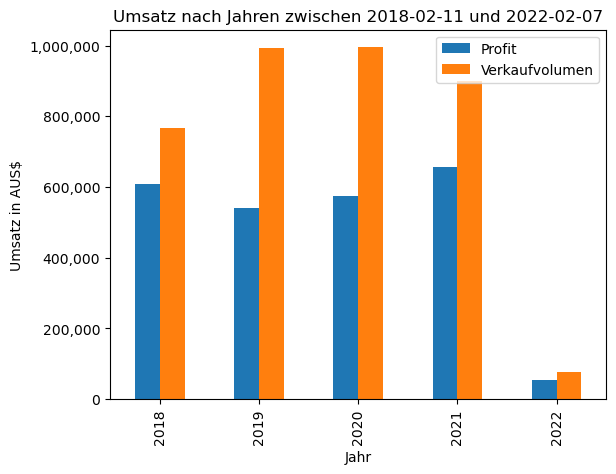

In [16]:
# Wie hoch war das Verkaufvolumen in den eizelnen Jahren? 
sales_volume = df.groupby(df['Order Date'].dt.year)['Total'].sum().round(2)

df['Total Profit'] = df['Order Quantity'] * df['Profit Margin']
profit_per_year = df.groupby(df['Order Date'].dt.year)['Total Profit'].sum().round(2)

sales_and_profit_df = pd.DataFrame({'Profit': profit_per_year, 'Verkaufvolumen': sales_volume})

ax = sales_and_profit_df.plot(kind='bar')

plt.xlabel('Jahr')
plt.ylabel('Umsatz in AUS$')
plt.title(f'Umsatz nach Jahren zwischen {first_order_day} und {last_order_day}')

# bessere Formatierung der y-Achsen Beschriftung
formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)
plt.show()

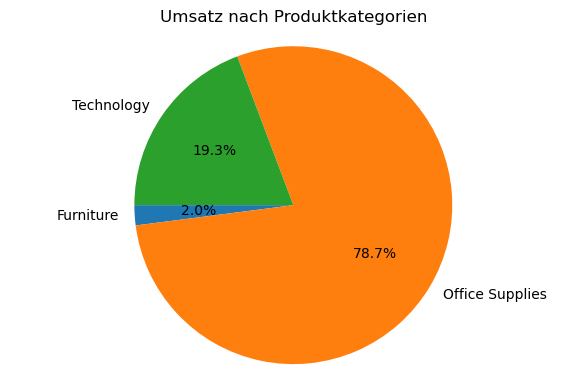

In [17]:
# Wie hoch ist der Anteil der Produktkategorien am Umsatz? 
revenue_by_category = df.groupby('Product Category', observed=False)['Sub Total'].sum()

plt.figure(figsize=(6, 4))
revenue_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.title('Umsatz nach Produktkategorien')
plt.ylabel('') 
plt.axis('equal') 
plt.tight_layout()
plt.show()

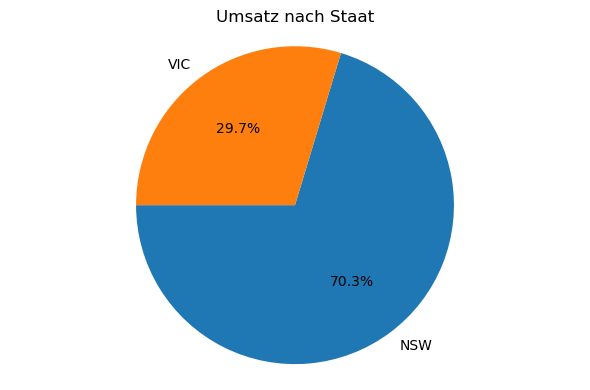

In [18]:
# In welchen Staaten wird am meisten Umsatz gemacht? 
revenue_by_category = df.groupby('State', observed=False)['Sub Total'].sum()

plt.figure(figsize=(6, 4))
revenue_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.title('Umsatz nach Staat')
plt.ylabel('') 
plt.axis('equal') 
plt.tight_layout()
plt.show()

## Analyse der Produktverkäufe und des Produktversands

In [19]:
# Mit welchen Produkten wird am meisten Profit gemacht? 
product_ranking = df.groupby(df['Product Name'])['Total Profit'].sum().sort_values(ascending=False)
print(product_ranking)

Product Name
Cando PC940 Copier                                  468246.02
HFX LaserJet 3310 Copier                            285714.00
Adesso Programmable 142-Key Keyboard                198807.46
UGen Ultra Professional Cordless Optical Suite      182940.72
Deluxe Rollaway Locking File with Drawer            174705.85
                                                      ...    
Artisan Hole Reinforcements for Hole-Punch Pages         6.32
UGen Ultra Eron Style Paps                               4.08
Smiths Premium Bright 1-Pary Blumk Carr Poncils          1.71
Col-Eucess Memo Sheets                                   1.48
Ecolon Metal Binder Clips                                1.02
Name: Total Profit, Length: 257, dtype: float64


In [20]:
# Von welchem Produkt werden die meisten Einheiten verkaufen? 
units_ordered_by_product = df.groupby('Product Name')['Order Quantity'].sum()

ranked_products = units_ordered_by_product.sort_values(ascending=False)

print("Produkte sortiert nach verkauften Einheiten")
print(ranked_products)

# Welches Produkt ist in den meisten Bestellungen enthalten? 
orders_per_product = df.groupby('Product Name')['Order No'].nunique()
ranked_products_by_orders = orders_per_product.sort_values(ascending=False)

print("Produkte sortiert nach Anzahl verschiedener Bestellungen")
print(ranked_products_by_orders)

Produkte sortiert nach verkauften Einheiten
Product Name
Artisan 474 Labels                                 3395.0
Smiths General Use 3-Ring Binders                  3220.0
Artisan 479 Labels                                 3039.0
Artisan 481 Labels                                 2996.0
Apex Preferred Stainless Steel Scissors            2896.0
                                                    ...  
UGen Ultra Eron Style Paps                            4.0
Artisan Arcent Highlighters                           3.0
Ecolon Metal Binder Clips                             1.0
Col-Eucess Memo Sheets                                1.0
Smiths Premium Bright 1-Pary Blumk Carr Poncils       1.0
Name: Order Quantity, Length: 257, dtype: float64
Produkte sortiert nach Anzahl verschiedener Bestellungen
Product Name
Artisan 474 Labels                         118
Apex Preferred Stainless Steel Scissors     92
Artisan 479 Labels                          88
Smiths General Use 3-Ring Binders           

In [21]:
# Welche Verpackungen gibt es?
print(df['Product Container'].unique())

# Angenommene Reihenfolge der größe:
product_container_order = ['Wrap Bag','Small Pack', 'Small Box', 'Medium Box', 'Large Box', 'Jumbo Drum']

['Small Box', 'Small Pack', 'Wrap Bag', 'Medium Box', 'Large Box', 'Jumbo Drum']
Categories (6, object): ['Jumbo Drum', 'Large Box', 'Medium Box', 'Small Box', 'Small Pack', 'Wrap Bag']


In [22]:
artisan_474_labels_orders_df = df[df['Product Name'] == 'Artisan 474 Labels'].copy()
artisan_474_labels_orders_df.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total,Total Profit
55,5028-1,2018-10-09,Frank Merwin,"260 Marrickville Rd,Marrickville",Sydney,NSW,Corporate,Nicholas Fernandes,Not Specified,Artisan 474 Labels,Furniture,Large Box,Regular Air,2018-10-11,1.84,2.88,1.04,17.0,26.62,0.0,0.17,26.53,0.99,26.46,17.68
62,5032-1,2018-12-16,Henry Goldwyn,"541 Church St,Richmond",Melbourne,VIC,Corporate,Yvette Biti,Medium,Artisan 474 Labels,Office Supplies,Small Box,Regular Air,2018-12-19,1.84,2.88,1.04,22.0,127.92,1.0,10.16,122.66,0.99,123.06,22.88
64,5034-1,2018-06-05,Deborah Brumfield,"501 George St,Sydney",Sydney,NSW,Small Business,Samantha Chairs,Medium,Artisan 474 Labels,Office Supplies,Small Box,Regular Air,2018-06-05,1.84,2.88,1.04,32.0,201.90,5.0,8.00,193.54,0.99,199.04,33.28
66,5034-1,2019-09-23,Grant Thornton,"98 Holdsworth Street,Woollahra",Sydney,NSW,Small Business,Natasha Song,Critical,Artisan 474 Labels,Technology,Small Box,Regular Air,2019-09-25,1.84,2.88,1.04,45.0,68.96,8.0,0.60,68.96,0.99,73.46,46.80
79,5039-1,2018-05-31,Rick Duston,"144 Biutee Rd,Marrickville",Sydney,NSW,Consumer,Charlie Bui,High,Artisan 474 Labels,Office Supplies,Small Box,Regular Air,2018-05-31,1.84,2.88,1.04,42.0,130.66,0.0,10.56,121.02,0.99,122.85,43.68


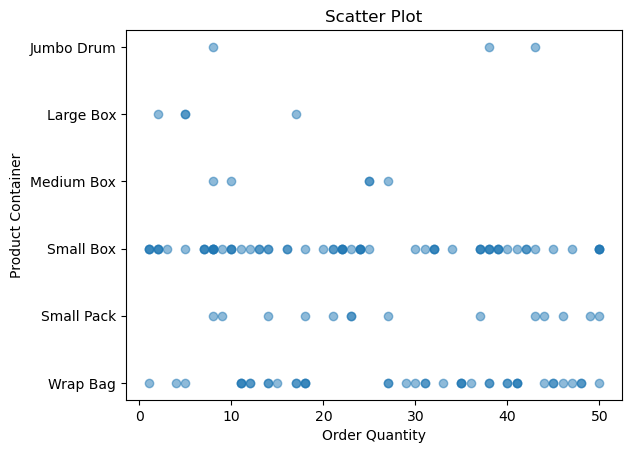

In [23]:
artisan_474_labels_orders_df['Product Container'] = pd.Categorical(artisan_474_labels_orders_df['Product Container'], categories=product_container_order, ordered=True)

plt.scatter(artisan_474_labels_orders_df['Order Quantity'], artisan_474_labels_orders_df['Product Container'].cat.codes, alpha=0.5)
plt.yticks(range(len(product_container_order)), product_container_order)
plt.xlabel('Order Quantity')
plt.ylabel('Product Container')
plt.title('Scatter Plot')
plt.show()

# Betrachtung zeitlicher Apskete
An welchen Wochentagen gehen die meisten Bestellungen ein? 
An welchen Wochentagen werden die meisten Bestllungen versand? 
Gibt es saisonale Unterschiede bei der Anzahl der Bestellungen? 

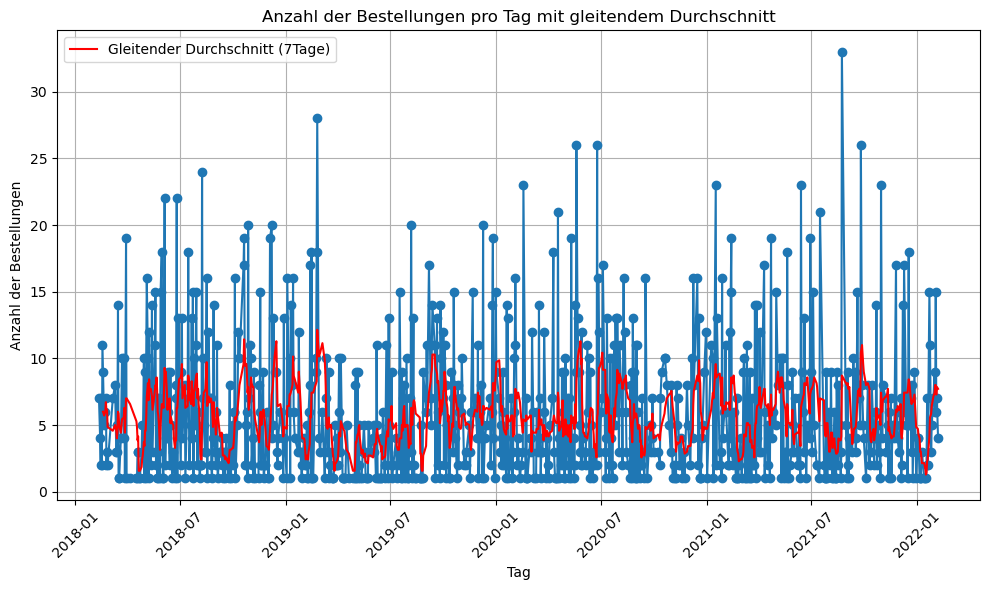

In [24]:
# Berechnung der Anzahl der Bestellungen pro Tag
value_counts = df['Order Date'].value_counts().sort_index()

# Berechnung des gleitenden Durschnitts über 7 Tage (Dadurch sind in jedem Wert alle Wochentage enthalten & saisonale Unterschied werden besser sichtbar)
moving_avg = value_counts.rolling(window=7).mean()

# Visualisierung als Zeit
plt.figure(figsize=(10, 6))
plt.plot(value_counts.index, value_counts.values, marker='o', linestyle='-')
plt.plot(moving_avg.index, moving_avg.values, color='red', label='Gleitender Durchschnitt (7Tage)')
plt.title('Anzahl der Bestellungen pro Tag mit gleitendem Durchschnitt')
plt.xlabel('Tag')
plt.ylabel('Anzahl der Bestellungen')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

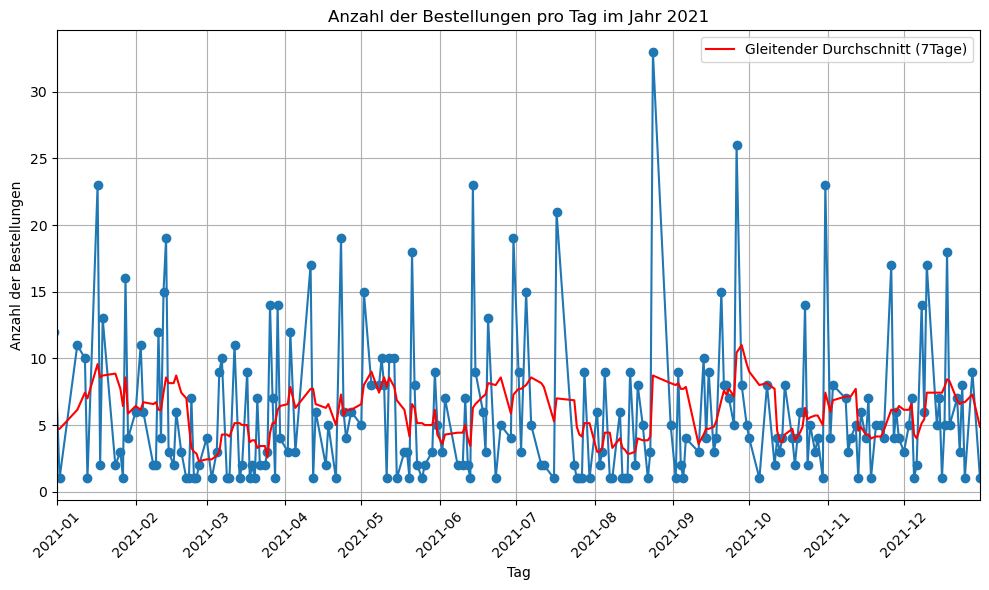

In [25]:
# Die obere Grafik ist nicht wirklich gut zu lesen, da alle Werte in der selben Grafik dargestellt sind.
# Jetzt ausschließlich das Jahr 2021
plt.figure(figsize=(10, 6))
plt.plot(value_counts.index, value_counts.values, marker='o', linestyle='-')
plt.plot(moving_avg.index, moving_avg.values, color='red', label='Gleitender Durchschnitt (7Tage)')
plt.title('Anzahl der Bestellungen pro Tag im Jahr 2021')
plt.xlabel('Tag')
plt.ylabel('Anzahl der Bestellungen')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2021-12-31')
plt.xlim(start_date, end_date)
plt.show()

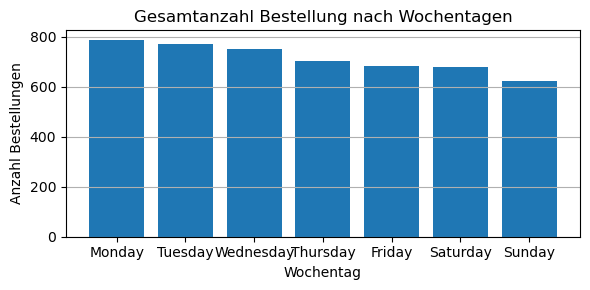

In [26]:
# An welchem Wochentag wird am häufigsten bestellt? 
day_of_week_counts = df['Order Date'].dt.dayofweek.value_counts()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(6, 3))
plt.bar(days_of_week, day_of_week_counts)
plt.title('Gesamtanzahl Bestellung nach Wochentagen')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl Bestellungen')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

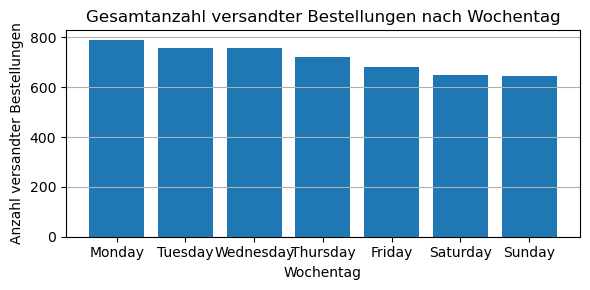

In [27]:
# An welchem Wochentag werden die Pakete versand? 
day_of_week_counts = df['Ship Date'].dt.dayofweek.value_counts()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(6, 3))
plt.bar(days_of_week, day_of_week_counts)
plt.title('Gesamtanzahl versandter Bestellungen nach Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl versandter Bestellungen')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [28]:
# Gibt es Produkte die besonders lange benötigen von Bestellung bis Auslieferung? 
df['Packaging Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
df.head(2)

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total,Total Profit,Packaging Duration
0,4293-1,2019-09-02,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,2019-09-04,156.50,300.97,144.47,23.0,4533.52,2.0,194.83,4757.22,7.18,4291.55,3322.81,2
1,5001-1,2020-10-24,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,2020-10-26,0.24,1.26,1.02,8.0,45.20,3.0,0.00,45.90,0.70,46.91,8.16,2


In [29]:
# Welche Eigenschaften haben die Werte der neuen Spalte 'Packaging Duration'?
overview = df['Packaging Duration'].describe()
print(overview)

count    5000.000000
mean        1.836200
std        20.349894
min      -365.000000
25%         1.000000
50%         2.000000
75%         2.000000
max       369.000000
Name: Packaging Duration, dtype: float64


In [30]:
# Der Negative Wert bei min ist auffällig!
# Wie hoch ist der Anteil der negativen Werte? 
negative_values_count = (df['Packaging Duration'] < 0).sum()
negative_percentage = (df['Packaging Duration'] < 0).mean() * 100

print(f"In {negative_values_count} Bestellungen liegt das Ship Date vor dem Order Date. \nDas betrifft {negative_percentage:.2f}% der Bestellungen in diesem Datensatz.")

In 75 Bestellungen liegt das Ship Date vor dem Order Date. 
Das betrifft 1.50% der Bestellungen in diesem Datensatz.


### Erste Interpretation der negativen Werte
Dies könnte zum Beispiel entweder ein Hinweis auf Messfehler sein, oder auf Fälle in denen der Bestellungsprozess nicht korrekt durch geführt wird und Bestellungen verschickt werden, bevor sie überhaupt im System aufgenommen werden.

In [31]:
negative_packaging_duration = df.loc[df['Packaging Duration'] <= -1, ['Order No', 'Order Date', 'Ship Date','Packaging Duration']]
negative_packaging_duration = negative_packaging_duration.sort_values(by='Packaging Duration', ascending=True)
negative_packaging_duration.head(40)

,Order No,Order Date,Ship Date,Packaging Duration
1245,5385-1,2019-09-29,2018-09-29,-365
1963,5603-1,2019-08-09,2018-08-10,-364
3455,6148-1,2021-12-31,2021-01-01,-364
1595,5479-1,2019-10-20,2018-10-21,-364
3412,6142-1,2021-12-28,2021-01-01,-361
3500,6165-1,2021-12-28,2021-01-04,-358
4445,6409-1,2021-12-24,2021-01-04,-354
4171,6333-1,2020-09-20,2020-01-21,-243
4272,6354-1,2021-09-20,2021-01-21,-242
4344,6379-1,2021-09-15,2021-04-16,-152


Bei Betrachtung der negativen Werte der Spalte ``Packaging Duration`` fällt auf, dass es einige Werte 
- im Bereich "-365" und größer gibt.
- im Bereich "-30" und größer gibt.

Bei diesen Werten kann die Vermutung aufgestellt werden, dass bei der Eingabe der Monat bzw, das Jahr um eine Stelle verrutscht ist. 
Um diese Vermutung weiter zu untersuch könnte man das Formular zur Erhebung der Daten betrachten: Ist dort eine Formularvalidierung implementiert? 
Leider liegen keine weiteren Informationen zur Erfassung der Daten vor.

In [32]:
subset_df = df.loc[:, ['Order No', 'Order Date', 'Ship Date', 'Packaging Duration']].sort_values(by='Packaging Duration', ascending=False)
subset_df.head(30)

,Order No,Order Date,Ship Date,Packaging Duration
2369,5740-1,2020-12-10,2021-12-14,369
4803,6523-1,2020-12-10,2021-12-14,369
4058,6313-1,2020-05-30,2021-05-30,365
2839,5933-1,2020-05-30,2021-05-30,365
3253,6081-1,2021-03-06,2022-02-07,338
3637,6209-1,2020-02-22,2021-01-04,317
3369,6128-1,2020-01-30,2020-12-02,307
1523,5459-1,2019-02-13,2019-12-15,305
2089,5645-1,2019-10-10,2019-12-17,68
1900,5581-1,2019-03-12,2019-05-14,63


### Betrachtung großer Werte der Spalte Packaging Duration

Auch bei der Betrachtung der größten positiven Werte der Spalte ``Packaging Duration`` fällt auf, dass es eine Häufung bei Werten

- im Bereich "365" und größer gibt.
- im Bereich "30" und größer gibt.
  
Auch bei diesen Werten liegt die Vermutung nahe, dass die es sich um falsche Eingaben handeln könnte.

<h2 style="color:blue">5. Zusammenfassung und Schlussfolgerung</h2>
<h2 style="color:blue">Aufgabenstellung (10 Pkt.)</h2>
<span style="color:blue">
Fassen Sie hier Ihre Fragestellung und Ihre Erkenntnisse aus Ihrer Analyse zusammen.

Sind Ihre Erkenntnisse das, was Sie erwartet haben? Warum oder warum nicht?
</span>

## Quellenverzeichnis